In [3]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
x, y = make_classification(n_samples=1000, n_redundant=5, n_informative=5, n_classes=2, random_state=1)

In [4]:
x

array([[ 0.07905876, -1.94169634, -0.79233349, ...,  0.38236601,
        -0.16604946,  1.3161356 ],
       [ 1.06817746, -1.00076294,  0.32336323, ...,  0.57345367,
         0.83244009, -0.07373813],
       [ 0.33087052, -0.26156072,  0.69755984, ...,  0.04086182,
         0.12527042,  0.09390759],
       ...,
       [-2.04512338,  0.61011952,  0.74617866, ...,  0.73522086,
         0.37239007, -0.81603244],
       [ 1.0231981 , -1.13130435, -1.00781492, ...,  1.20074478,
        -0.21533739, -0.68928938],
       [-0.52395376,  1.35809244, -1.57969785, ...,  1.15198417,
        -0.32736357, -0.32984344]])

In [5]:
y

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test,Y_train, Y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

In [8]:
X_train

array([[ 0.87185499,  0.28129003,  0.026681  , ...,  1.62907991,
         1.04796263, -0.51409272],
       [-0.69610299, -0.725587  , -1.4348084 , ...,  0.62918556,
        -1.26157517,  0.97299341],
       [-1.21038298, -1.14840838,  0.11991714, ...,  0.95209773,
        -0.45984232, -1.14777904],
       ...,
       [-0.05304284, -0.1219943 , -0.06696177, ...,  1.7415842 ,
        -0.39583208,  0.38660489],
       [ 1.5455334 , -1.79124057, -0.2585889 , ...,  0.75794421,
        -0.69473219,  1.26859808],
       [ 1.06126568, -1.32570095,  0.00891496, ...,  2.04262814,
        -1.73634985,  0.90734272]])

In [10]:
model = LogisticRegression()

In [11]:
model.fit(X_train, Y_train)

LogisticRegression()

In [12]:
y_pred = model.predict(X_test)

In [13]:
# Evaluation metrics 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 

In [14]:
print(confusion_matrix(Y_test, y_pred))
print(accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))


[[129  23]
 [ 36 112]]
0.8033333333333333
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       152
           1       0.83      0.76      0.79       148

    accuracy                           0.80       300
   macro avg       0.81      0.80      0.80       300
weighted avg       0.81      0.80      0.80       300



In [21]:
from sklearn.metrics import roc_curve, auc 
import matplotlib.pyplot as plt 

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

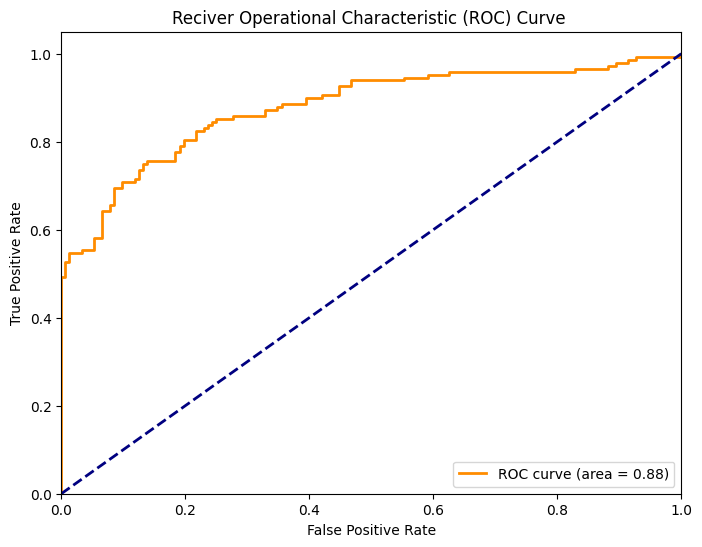

In [22]:
#plot roc auc curve 
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', linewidth=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linewidth=2, linestyle='--') #plots the diagonal line
plt.xlim([0.0, 1]) #plots the X limit
plt.ylim([0.0, 1.05]) # plots the Y limit
plt.xlabel('False Positive Rate') # Sets the X label
plt.ylabel('True Positive Rate') #Sets the Y label
plt.title('Reciver Operational Characteristic (ROC) Curve ')
plt.legend(loc="lower right") # Add the legend to the plot 
plt.show()

In [23]:
#precision recall accuracy tradeoff to decide optimal treshold

C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


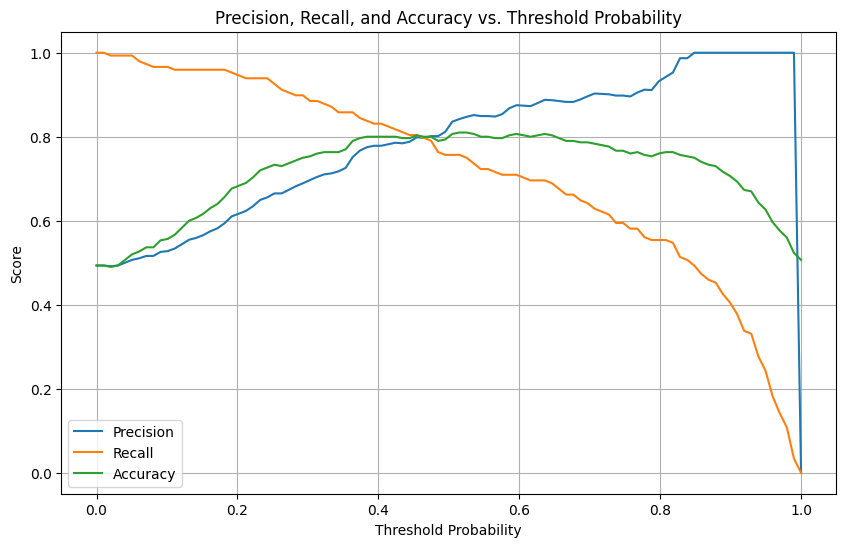

In [26]:
# Import necessary libraries
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Calculate precision, recall, and accuracy for different threshold probabilities
thresholds = np.linspace(0, 1, 100)
precisions = []
recalls = []
accuracies = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    precision = precision_score(Y_test, y_pred_threshold)
    recall = recall_score(Y_test, y_pred_threshold)
    accuracy = accuracy_score(Y_test, y_pred_threshold)
    precisions.append(precision)
    recalls.append(recall)
    accuracies.append(accuracy)

# Plot precision, recall, and accuracy against threshold probabilities
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, accuracies, label='Accuracy')
plt.xlabel('Threshold Probability')
plt.ylabel('Score')
plt.title('Precision, Recall, and Accuracy vs. Threshold Probability')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
#observation>> cutoff =0.4

new_pred_levels =  np.where(y_pred_proba > 0.4, 1, 0)

print(confusion_matrix(Y_test,new_pred_levels))
print(accuracy_score(Y_test,new_pred_levels))
print(classification_report(Y_test,new_pred_levels))

[[117  35]
 [ 25 123]]
0.8
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       152
           1       0.78      0.83      0.80       148

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



In [30]:
#cross validation
from sklearn.model_selection import KFold

cv = KFold(n_splits=5)

from sklearn.model_selection import cross_val_score
acc = cross_val_score(model, X_train, Y_train, cv=cv)

acc

np.mean(acc)

np.float64(0.7928571428571428)